In [1]:
import os
import pandas as pd

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Load and print the first 5 rows with headers for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Print the first 5 rows with headers
    print(f"\nDataset: {os.path.basename(dataset_path)}")
    print(df.head())



Dataset: Dataset_NO1.csv
                        Date Instance Type      Region   Price
0  2017-05-08 21:45:35+00:00    r3.2xlarge  us-west-1c  0.1763
1  2017-05-08 21:45:22+00:00    g2.2xlarge  us-west-1b  0.2302
2  2017-05-08 21:45:22+00:00    g2.2xlarge  us-west-1c  0.2214
3  2017-05-08 21:45:21+00:00   m4.16xlarge  us-west-1c  0.7510
4  2017-05-08 21:45:18+00:00    c3.8xlarge  us-west-1c  0.2952

Dataset: Dataset_NO2.csv
                        Date Instance Type      Region   Price
0  2017-05-08 21:45:45+00:00    c3.4xlarge  us-west-1b  0.5022
1  2017-05-08 21:45:29+00:00    c4.8xlarge  us-west-1b  1.6136
2  2017-05-08 21:45:27+00:00    c3.8xlarge  us-west-1b  1.0150
3  2017-05-08 21:45:27+00:00    c3.8xlarge  us-west-1c  1.0038
4  2017-05-08 21:45:26+00:00     m2.xlarge  us-west-1c  0.0995

Dataset: Dataset_NO3.csv
                        Date Instance Type      Region   Price
0  2017-05-08 21:45:35+00:00    r3.2xlarge  us-west-1c  0.2763
1  2017-05-08 21:45:22+00:00    g2.2xlar

C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\2500598513.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\2500598513.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\2500598513.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

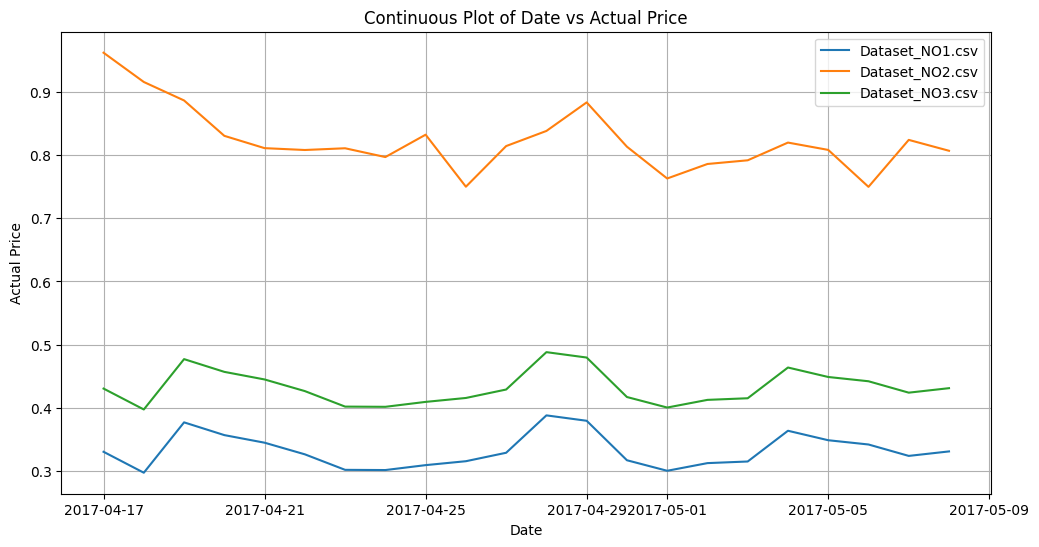

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = 'D'  # Daily interval, change as needed

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Actual Price")

# Plot Date vs Actual Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Actual Price")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Price' column in each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Extract the 'Price' column for normalization
    prices = df['Price'].values.reshape(-1, 1)

    # Fit and transform the scaler on 'Price'
    normalized_prices = scaler.fit_transform(prices)

    # Update the 'Price' column in the DataFrame with normalized values
    df['Price'] = normalized_prices

    # Print the first 5 rows with normalized 'Price' column
    print(f"\nDataset: {os.path.basename(dataset_path)} (Normalized Prices)")
    print(df.head())

    # Save the normalized dataset to a new CSV file if needed
    # df.to_csv(os.path.splitext(dataset_path)[0] + '_normalized.csv', index=False)



Dataset: Dataset_NO1.csv (Normalized Prices)
                        Date Instance Type      Region     Price
0  2017-05-08 21:45:35+00:00    r3.2xlarge  us-west-1c  0.002768
1  2017-05-08 21:45:22+00:00    g2.2xlarge  us-west-1b  0.003631
2  2017-05-08 21:45:22+00:00    g2.2xlarge  us-west-1c  0.003490
3  2017-05-08 21:45:21+00:00   m4.16xlarge  us-west-1c  0.011964
4  2017-05-08 21:45:18+00:00    c3.8xlarge  us-west-1c  0.004671

Dataset: Dataset_NO2.csv (Normalized Prices)
                        Date Instance Type      Region     Price
0  2017-05-08 21:45:45+00:00    c3.4xlarge  us-west-1b  0.005873
1  2017-05-08 21:45:29+00:00    c4.8xlarge  us-west-1b  0.019030
2  2017-05-08 21:45:27+00:00    c3.8xlarge  us-west-1b  0.011943
3  2017-05-08 21:45:27+00:00    c3.8xlarge  us-west-1c  0.011811
4  2017-05-08 21:45:26+00:00     m2.xlarge  us-west-1c  0.001106

Dataset: Dataset_NO3.csv (Normalized Prices)
                        Date Instance Type      Region     Price
0  2017-05-08 21:

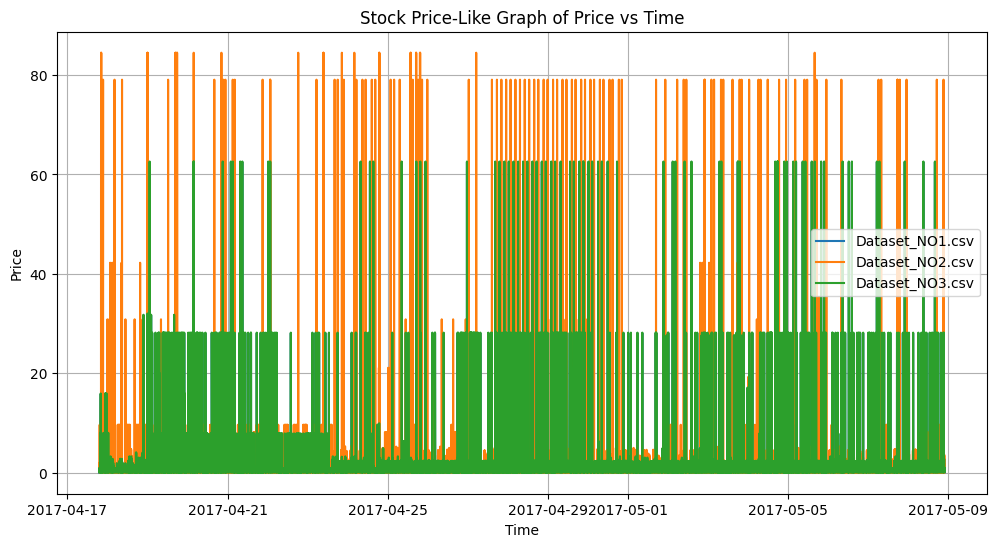

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Stock Price-Like Graph of Price vs Time")

# Plot Stock Price-Like Graph of Price vs Time for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Sort the DataFrame by 'Date' for a continuous curve
    df.sort_values(by='Date', inplace=True)

    # Plot Stock Price-Like Graph
    plt.plot(df['Date'], df['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1471320463.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1471320463.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1471320463.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

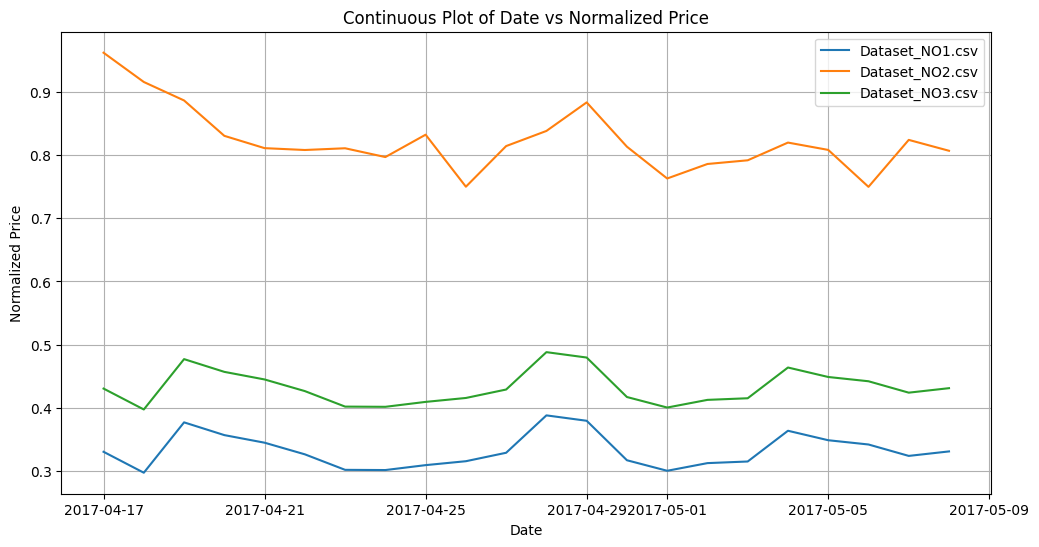

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = 'D'  # Daily interval, change as needed

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


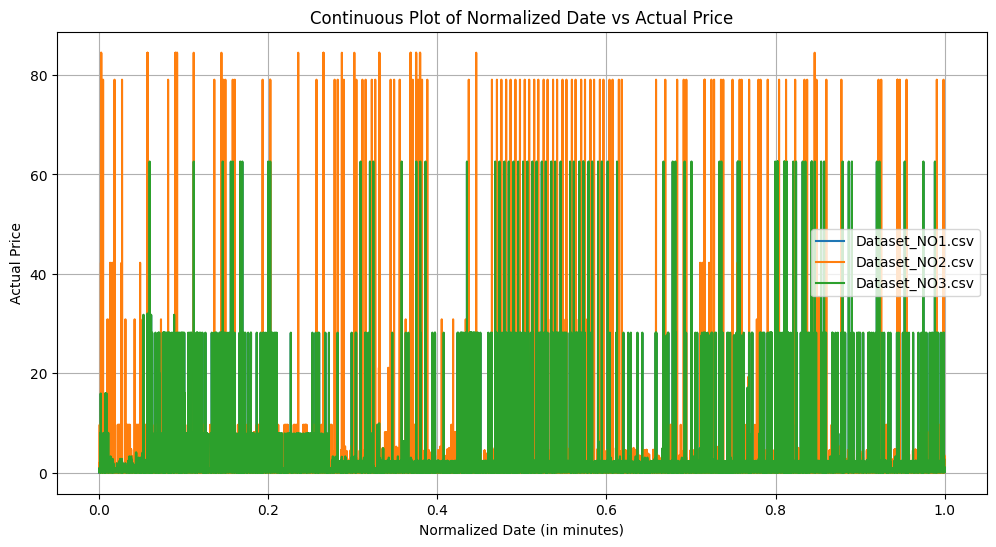

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize MinMaxScaler for 'Date' normalization
date_scaler = MinMaxScaler()

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Normalized Date vs Actual Price")

# Plot Normalized Date vs Actual Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Normalize 'Date' to represent time in minutes
    df['Normalized_Date'] = date_scaler.fit_transform(df['Date'].values.reshape(-1, 1))

    # Plot Normalized Date vs Actual Price
    plt.plot(df['Normalized_Date'], df['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Normalized Date (in minutes)")
plt.ylabel("Actual Price")
plt.legend()
plt.grid(True)
plt.show()


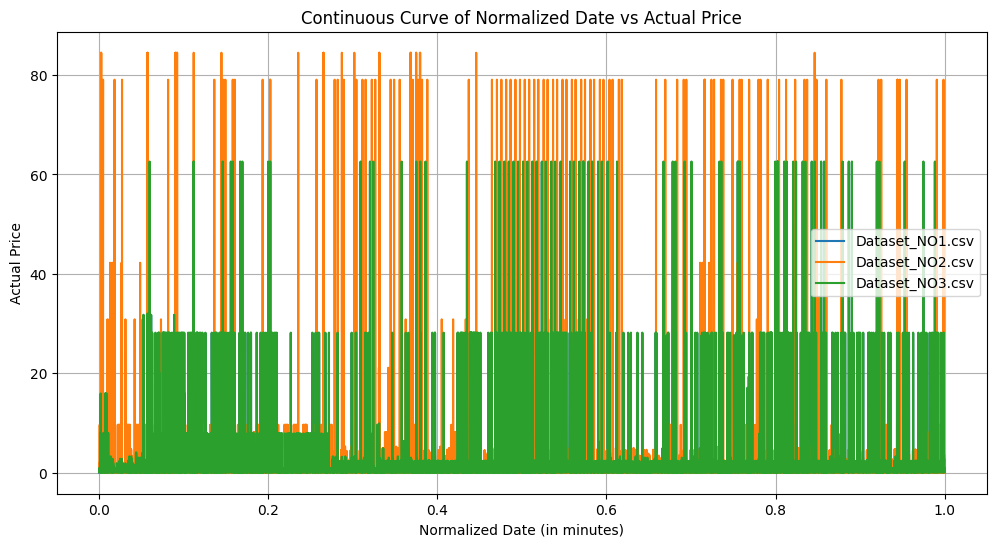

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize MinMaxScaler for 'Date' normalization
date_scaler = MinMaxScaler()

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Curve of Normalized Date vs Actual Price")

# Plot Continuous Curve of Normalized Date vs Actual Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Normalize 'Date' to represent time in minutes
    df['Normalized_Date'] = date_scaler.fit_transform(df['Date'].values.reshape(-1, 1))

    # Sort the DataFrame by 'Normalized_Date' for a continuous curve
    df.sort_values(by='Normalized_Date', inplace=True)

    # Plot Continuous Curve
    plt.plot(df['Normalized_Date'], df['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Normalized Date (in minutes)")
plt.ylabel("Actual Price")
plt.legend()
plt.grid(True)
plt.show()


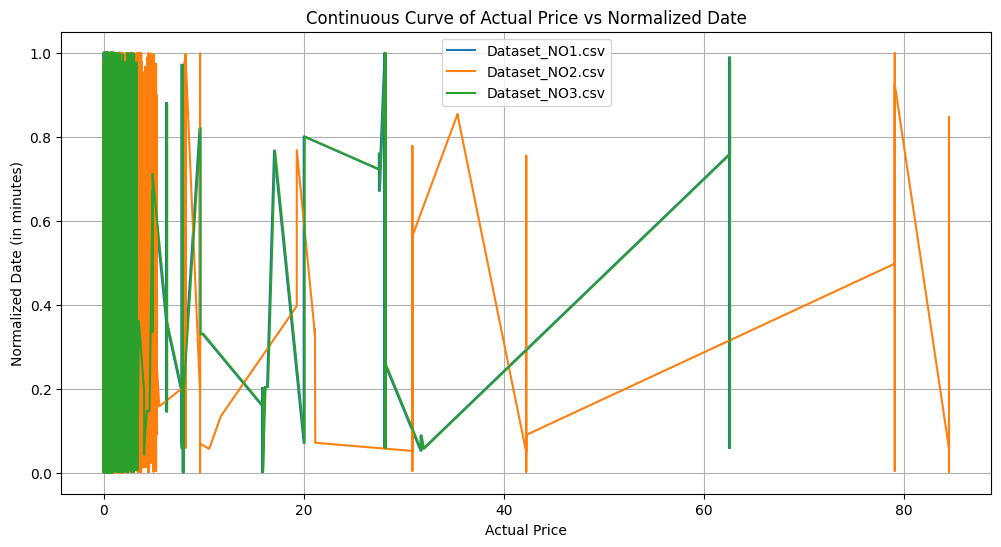

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize MinMaxScaler for 'Date' normalization
date_scaler = MinMaxScaler()

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Curve of Actual Price vs Normalized Date")

# Plot Continuous Curve of Actual Price vs Normalized Date for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Normalize 'Date' to represent time in minutes
    df['Normalized_Date'] = date_scaler.fit_transform(df['Date'].values.reshape(-1, 1))

    # Sort the DataFrame by 'Price' for a continuous curve
    df.sort_values(by='Price', inplace=True)

    # Plot Continuous Curve
    plt.plot(df['Price'], df['Normalized_Date'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Actual Price")
plt.ylabel("Normalized Date (in minutes)")
plt.legend()
plt.grid(True)
plt.show()


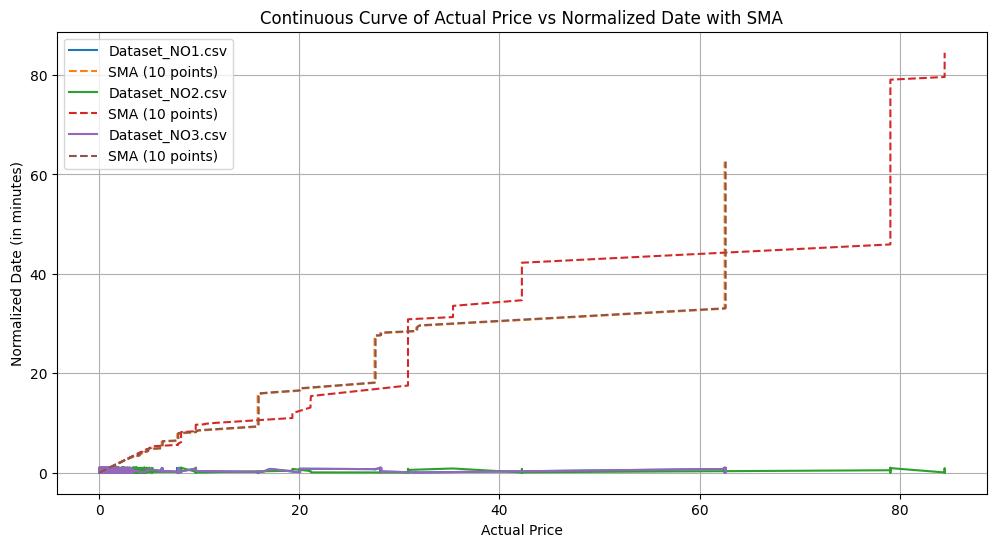

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize MinMaxScaler for 'Date' normalization
date_scaler = MinMaxScaler()

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Curve of Actual Price vs Normalized Date with SMA")

# Plot Continuous Curve of Actual Price vs Normalized Date for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Normalize 'Date' to represent time in minutes
    df['Normalized_Date'] = date_scaler.fit_transform(df['Date'].values.reshape(-1, 1))

    # Sort the DataFrame by 'Price' for a continuous curve
    df.sort_values(by='Price', inplace=True)

    # Plot Continuous Curve
    plt.plot(df['Price'], df['Normalized_Date'], label=os.path.basename(dataset_path))

    # Calculate and plot Simple Moving Average (SMA) for 'Price'
    window_size = 10  # Adjust the window size as needed
    sma = df['Price'].rolling(window=window_size).mean()
    plt.plot(df['Price'], sma, label=f'SMA ({window_size} points)', linestyle='--')

# Customize the plot
plt.xlabel("Actual Price")
plt.ylabel("Normalized Date (in minutes)")
plt.legend()
plt.grid(True)
plt.show()


     ---------------------------------------- 0.0/89.0 kB ? eta -:--:--
     ---------------------------------------- 89.0/89.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21201 sha256=406a5aa342471af7bd3453710d87660030a26a7b23f53622150bbdc8695ebc03
  Stored in directory: c:\users\kevin\appdata\local\pip\cache\wheels\5d\a1\eb\b98ee80431eb8217a22381e1725048be8cd0385675b151be45
Successfully built mplcursors


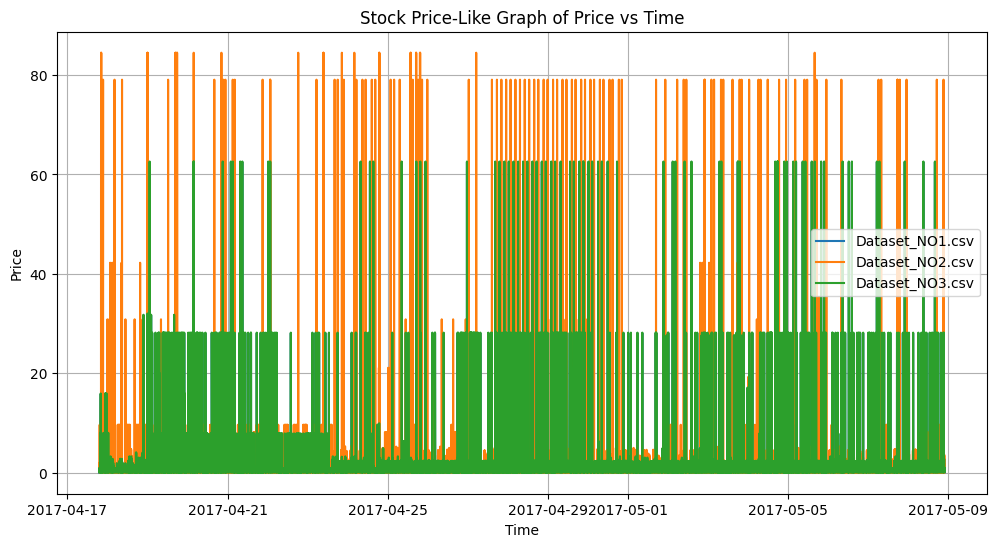

In [11]:
!pip install mplcursors
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors  # Import mplcursors for cursor functionality

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Stock Price-Like Graph of Price vs Time")

# Plot Stock Price-Like Graph of Price vs Time for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Sort the DataFrame by 'Date' for a continuous curve
    df.sort_values(by='Date', inplace=True)

    # Plot Stock Price-Like Graph
    line, = plt.plot(df['Date'], df['Price'], label=os.path.basename(dataset_path))

    # Add cursor functionality
    mplcursors.cursor(hover=True).connect(
        "add", lambda sel: sel.annotation.set_text(f"Price: {sel.artist.get_ydata()[sel.target.index]:.2f}")
    )

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\3366835440.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\3366835440.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\3366835440.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

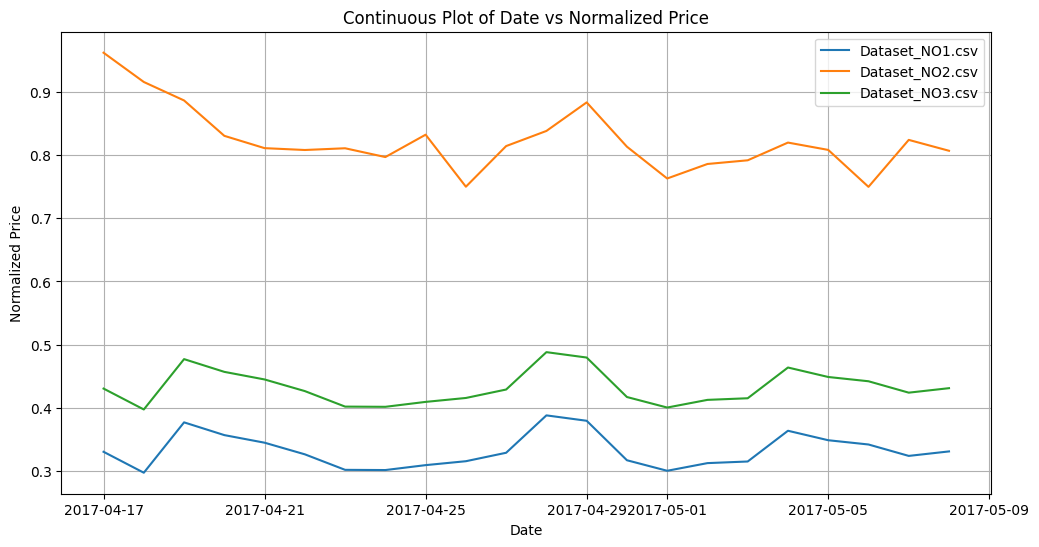

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = 'D'  # Change to '1D' for 1-day interval

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

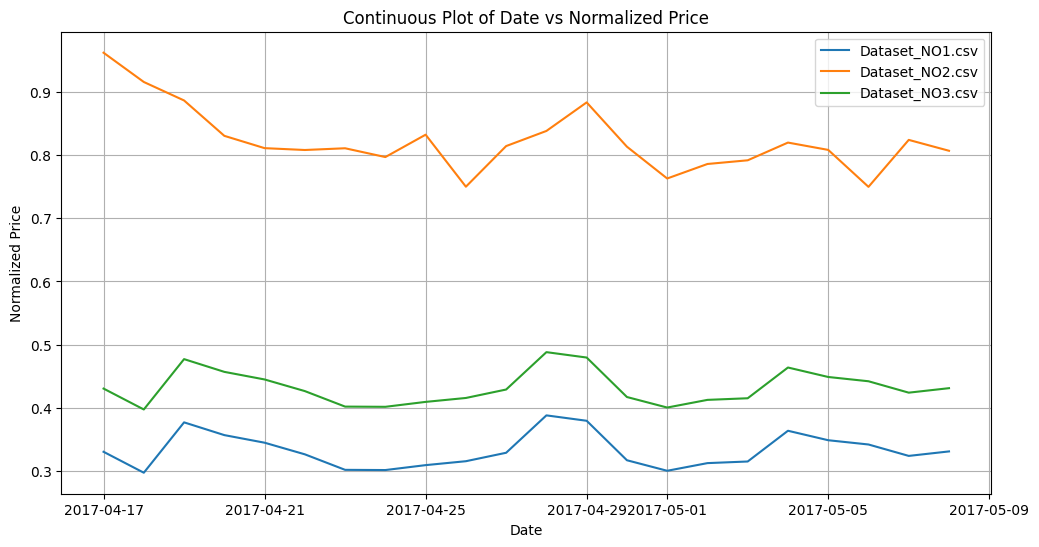

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1D'  # 1-day interval

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4204060488.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4204060488.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4204060488.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

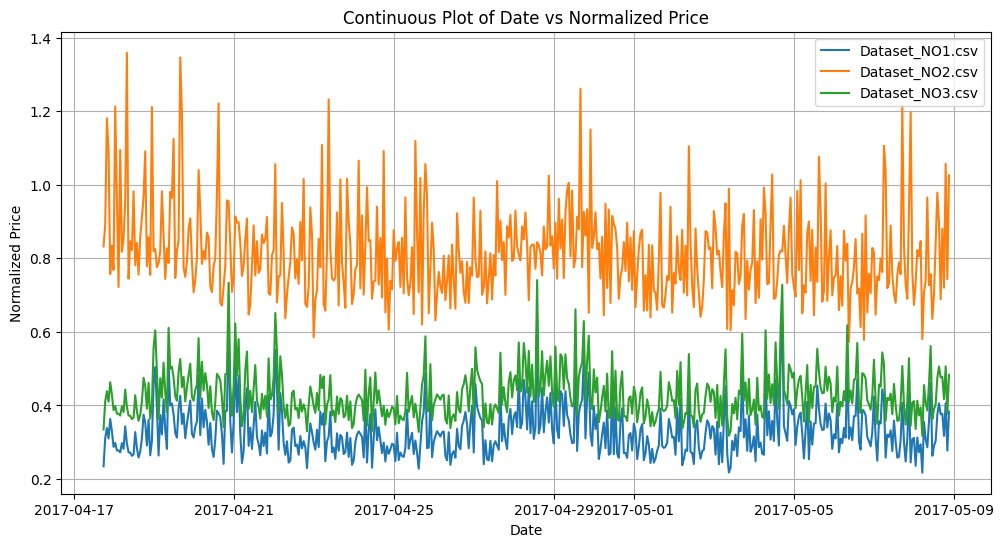

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1H'  # 1-hour interval

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1081956166.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1081956166.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1081956166.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

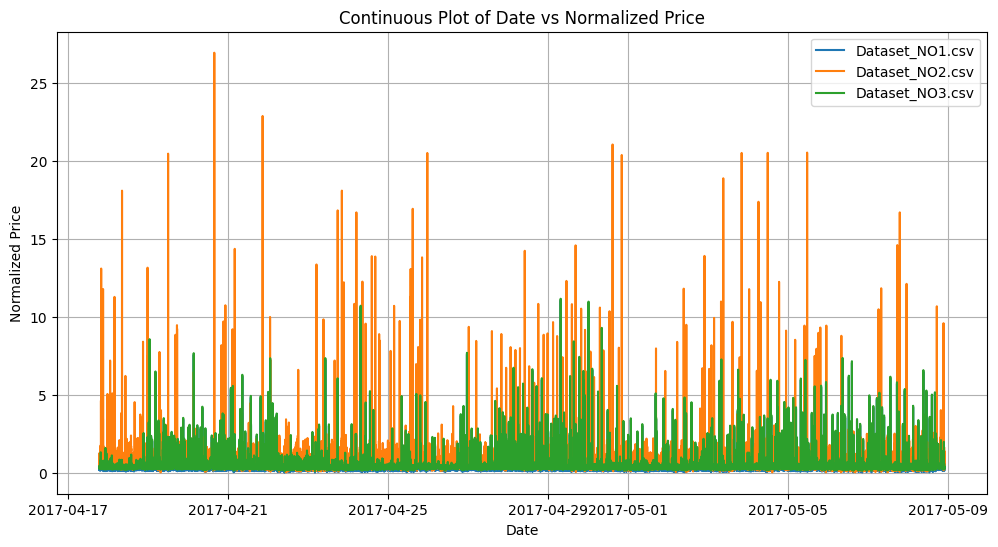

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly, 1-minute)
plot_interval = '1T'  # 1-minute interval

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4086680888.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4086680888.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4086680888.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid f

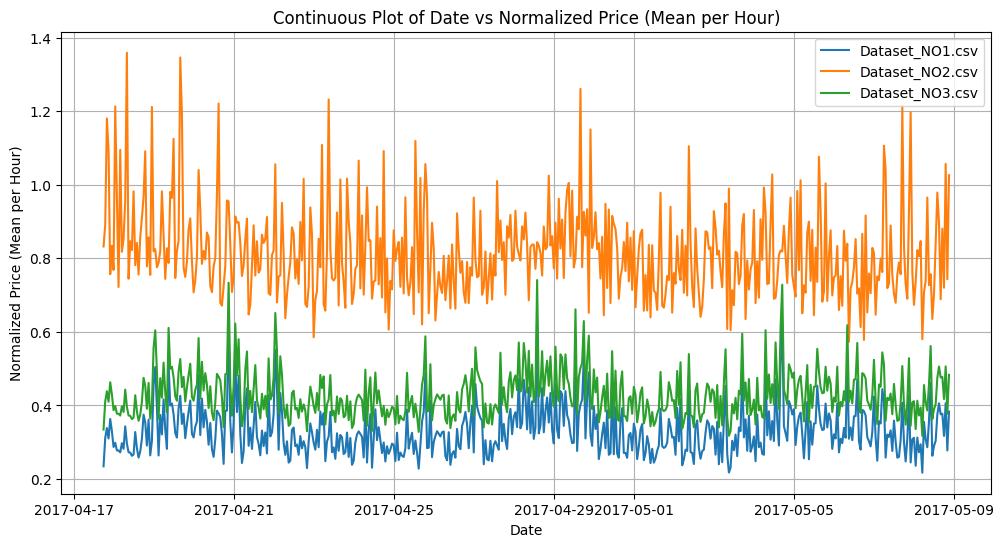

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly, 1-minute)
plot_interval = '1H'  # 1-hour interval, selecting mean value for each hour

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price (Mean per Hour)")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval, taking the mean for each hour
    df_resampled = df.resample(plot_interval).mean()  
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price (Mean per Hour)")
plt.legend()
plt.grid(True)
plt.show()
